In [7]:
import os
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.image as mpimg
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input



# Define the path for loading the images of all categories

In [10]:
base_path = '/Users/Disalo/SPICED/euclidean_eukalyptus/payam_work/Week_09/imageclassifier/data/'
classes = os.listdir(base_path)

In [11]:
for class_ in classes:
    print(class_)

Hand
empty
Gloves
Me


# Define a function to load images

In [12]:
def load_image(base_path):
    """it loads all the image into X and the classes in y """
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    for class_ in classes:
        files = os.listdir(base_path+class_)
        #print(files)
        for file in files:
            if file[-3:] == 'png':
                pic = tf.keras.utils.load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
                numpy_image = np.array(pic)
                processed_image = preprocess_input(numpy_image)
                X_list.append(processed_image)
                y_list.append(class_)
            
    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y, classes

In [13]:
X,y,classes= load_image(base_path)

In [14]:
X.shape

(308, 224, 224, 3)

# Define a dictionary to factorize the labels

In [15]:
my_dict = {"Me":0, "Hand":1, "Gloves":2}

In [16]:
y = np.vectorize(my_dict.get)(y)

# Categorize the labels

In [17]:
y = to_categorical(y)

In [18]:
y.shape

(308, 3)

# Structure a Network with dense layers

In [19]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential([
    Conv2D(filters = 6, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' ,input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'same'),
    BatchNormalization(),
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'same'),
    
    Flatten(),
    
    Dense(120,activation='relu'),
    Dropout(0.2),
    Dense(84,activation='relu'),
    Dense(3,activation= 'softmax')

    
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 6)       24        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               6

# Compile & Fit the model

In [22]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(X,y,batch_size=32, epochs=10,validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 6s 706ms/step - loss: 0.6014 - accuracy: 0.8699 - val_loss: 5.5973 - val_accuracy: 0.7581
Epoch 2/10
8/8 [==============================] - 6s 684ms/step - loss: 1.1485e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 6s 683ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 6s 690ms/step - loss: 1.2077e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 6s 687ms/step - loss: 1.6718e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 6s 683ms/step - loss: 9.6918e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 6s 684ms/step - loss: 0.0048 - accuracy: 0.9959 - val_loss: 0.0000e+00 - v

# Plot loss & accurycy progress

Text(0, 0.5, 'accuracy')

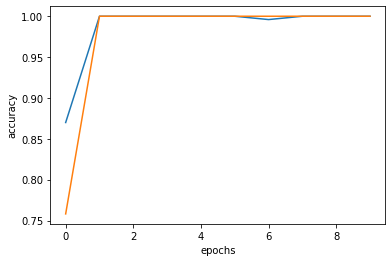

In [24]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

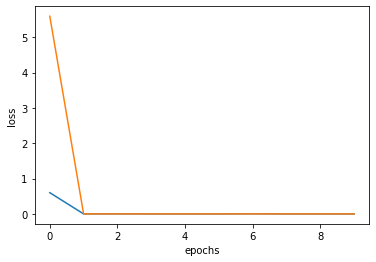

In [25]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [26]:
model.save('/Users/Disalo/SPICED/euclidean_eukalyptus/payam_work/Week_09/imageclassifier/models/CNN_model.h5')